## This notebook gives an example to interpolate ERA5 to DARDAR locations

In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from datetime import datetime, timedelta
from DARDAR import DARDARProduct
from ERA import ERA5
from dardar2era import dardar2era
from alt2pressure import alt2pres

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

#### define custom pressure grid over which data is to be interpolated

In [2]:
p_grid = alt2pres(np.arange(-100, 25000, 250)) * 0.01
print(p_grid)

[1025.32072994  995.3598458   966.11185038  937.5636937   909.70249223
  882.51552772  855.99024599  830.11425577  804.87532749  780.26139212
  756.26053996  732.86101951  710.05123625  687.81975148  666.15528116
  645.0466947   624.48301386  604.4534115   584.94721049  565.95388248
  547.46304679  529.46446922  511.94806091  494.90387717  478.32211632
  462.19311858  446.50736485  431.25547562  416.42820981  402.01646359
  388.0112693   374.40379424  361.18533959  348.34733924  335.88135865
  323.77909375  312.03236979  300.63314019  289.57348544  278.84561199
  268.44185107  258.35465763  248.57660919  239.10040473  229.91886357
  221.02492426  212.41164348  204.07219492  195.99986817  188.18806764
  180.63031142  173.32023022  166.25156625  159.41817211  152.81400976
  146.43314933  140.26976813  134.3181495   128.57268176  123.02785709
  117.67827049  112.5186187   107.54369909  102.74840862   98.12774277
   93.67679444   89.39075292   85.26490281   81.29462298   77.47538547
   73.

Creating file:  url: https://cds.climate.copernicus.eu/api/v2
key: 63394:602acfdf-3bd4-43d5-9e0e-50fe7dc26ed2

ERA5/reanalysis-era5-pressure-levels/reanalysis-era5-pressure-levels_2015110623_temperature.nc  already exists.
Creating file:  url: https://cds.climate.copernicus.eu/api/v2
key: 63394:602acfdf-3bd4-43d5-9e0e-50fe7dc26ed2

ERA5/reanalysis-era5-pressure-levels/reanalysis-era5-pressure-levels_2015110623_geopotential.nc  already exists.
Creating file:  url: https://cds.climate.copernicus.eu/api/v2
key: 63394:602acfdf-3bd4-43d5-9e0e-50fe7dc26ed2

ERA5/reanalysis-era5-pressure-levels/reanalysis-era5-pressure-levels_2015110623_specific_humidity.nc  already exists.
Creating file:  url: https://cds.climate.copernicus.eu/api/v2
key: 63394:602acfdf-3bd4-43d5-9e0e-50fe7dc26ed2

ERA5/reanalysis-era5-pressure-levels/reanalysis-era5-pressure-levels_2015110623_specific_cloud_liquid_water_content.nc  already exists.


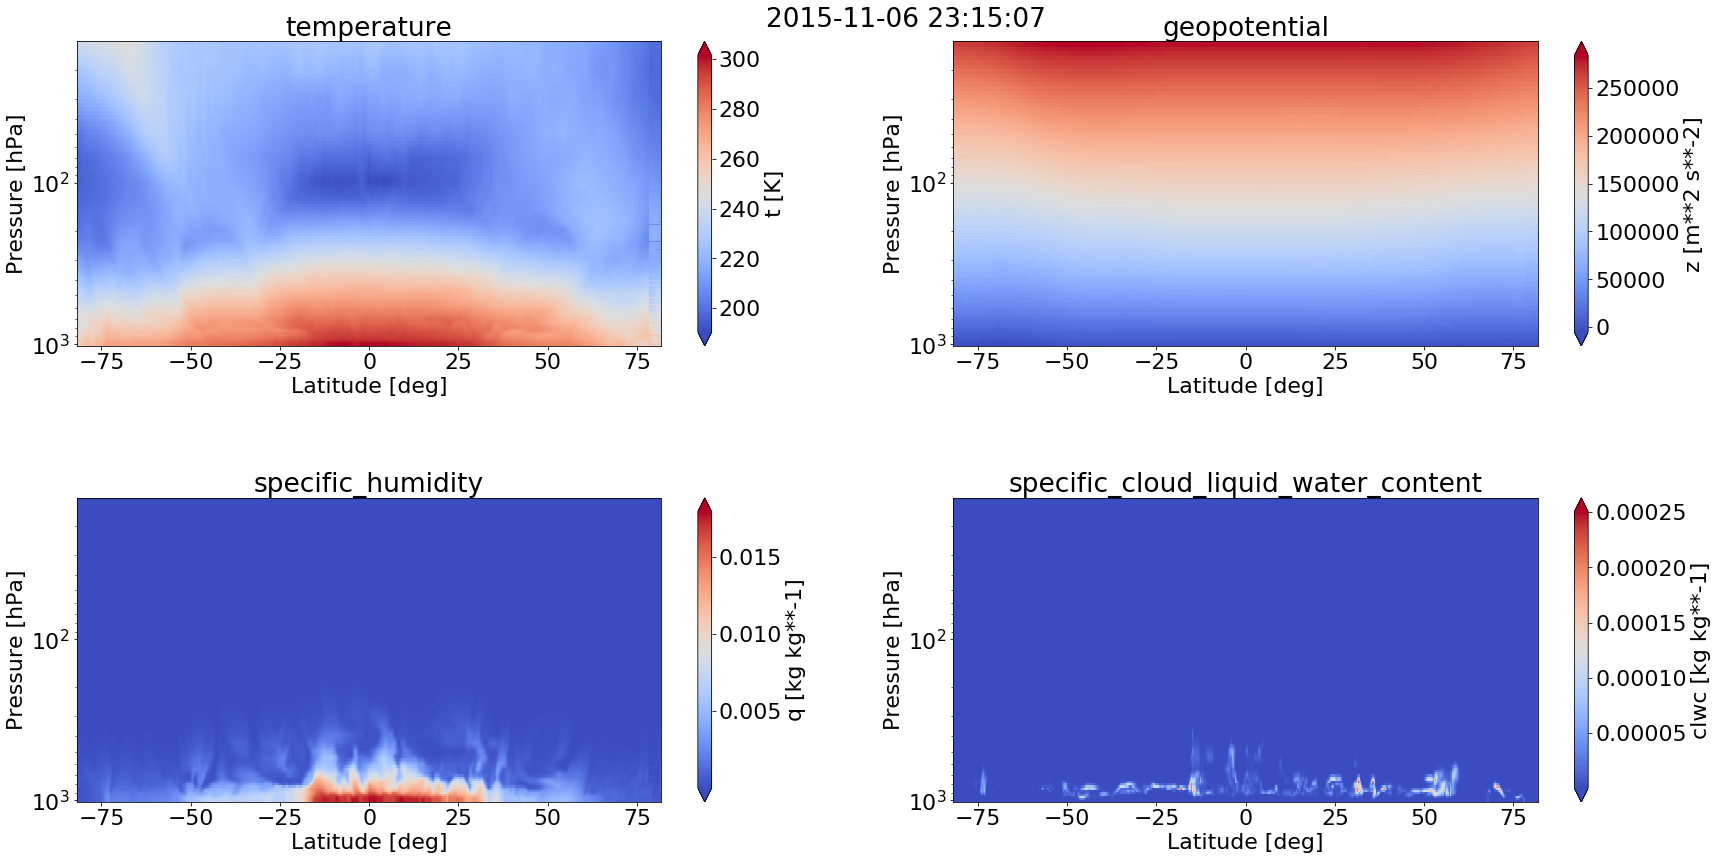

In [3]:
filename = os.path.expanduser("~/Dendrite/SatData/DARDAR/2015/11/06/DARDAR-CLOUD_v2.1.1_2015310231507_50677.hdf")

# create DARDAR instance
dardar = DARDARProduct(filename)
  
# time stamp of DARDAR data 
t_0 = dardar.filename2date()
t_1 = t_0 + timedelta(minutes = 30)


lon_d = dardar.get_data('longitude')
lat_d = dardar.get_data('latitude')

# create ERA5 product instance based on DARDAR timestamp

fig, axs = plt.subplots(2, 2, figsize=(24, 12))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.2, hspace = 0.5)

for var, ax in zip(["temperature", "geopotential", "specific_humidity", 
                    "specific_cloud_liquid_water_content"], axs.ravel()):
    ERA = ERA5(t_0, t_1, var)

# regrid ERA5 to DARDAR locations

    grid_t = dardar2era(dardar, ERA, p_grid)
    
# plot gridded data
    im = ax.pcolormesh(lat_d, p_grid, grid_t, shading = 'auto', cmap = 'coolwarm')

    fig.colorbar(im, ax=ax, label = ERA.shortname + " ["+  ERA.era[ERA.shortname].units + "]", extend = 'both')

    ax.set_xlabel('Latitude [deg]')
    ax.set_ylabel('Pressure [hPa]')

    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_title(ERA.longname)
    ax.set_yscale('log')
fig.suptitle(t_0)
fig.savefig('DARDAR_ERA_interpolation.png', bbox_inches = 'tight')

### plot DARDAR data locations

/home/inderpreet/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


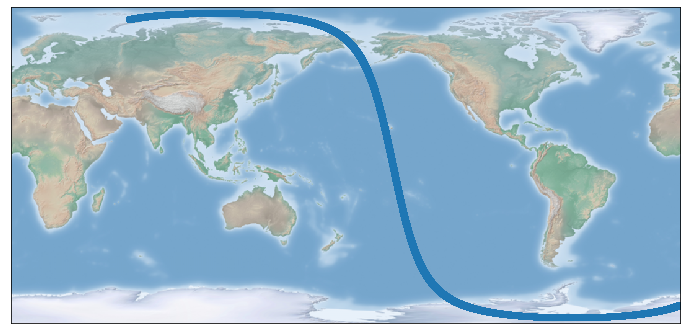

In [4]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(12, 6))
m = Basemap(llcrnrlon=0.,llcrnrlat=-85.,urcrnrlon=360.,urcrnrlat=85.,\
              rsphere=(6378137.00,6356752.3142),\
              resolution='c',projection='cyl')
m.shadedrelief(scale = 0.1)

lon_d = lon_d % 360
m.scatter(lon_d[:],lat_d[:], latlon = True)
plt.savefig('dardar_pass.png', bbox_inches = 'tight')
plt.show()
